In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('../../../datasets/used_bike/Used_Bikes.csv')

In [3]:
df_train.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [5]:
df_train.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [6]:
df_train.shape

(32648, 8)

In [7]:


# Assuming your DataFrame is called df and has a 'brand' column

# Clean brand names (remove whitespace)
df_train['brand'] = df_train['brand'].str.strip()

# Create brand category mapping
brand_category_map = {
    # Premium
    'BMW': 'premium',
    'Ducati': 'premium',
    'Harley-Davidson': 'premium',
    'Triumph': 'premium',
    'Indian': 'premium',
    'MV': 'premium',
    'Benelli': 'premium',
    'Kawasaki': 'premium',

    # Mid-range
    'Royal Enfield': 'mid',
    'KTM': 'mid',
    'Jawa': 'mid',
    'Hyosung': 'mid',
    'Yamaha': 'mid',
    'Suzuki': 'mid',

    # Budget
    'Hero': 'budget',
    'Honda': 'budget',
    'TVS': 'budget',
    'Bajaj': 'budget',
    'Mahindra': 'budget',
    'LML': 'budget',
    'Rajdoot': 'budget',
    'Ideal': 'budget'
}

# Apply the mapping
df_train['brand_category'] = df_train['brand'].map(brand_category_map)

# ✅ Optional: check the result
print(df_train[['brand', 'brand_category']].drop_duplicates().sort_values(by='brand'))


                brand brand_category
359               BMW        premium
12              Bajaj         budget
18            Benelli        premium
92             Ducati        premium
133   Harley-Davidson        premium
7                Hero         budget
6               Honda         budget
110           Hyosung            mid
7467            Ideal         budget
367            Indian        premium
288              Jawa            mid
33                KTM            mid
61           Kawasaki        premium
4960              LML         budget
6792               MV        premium
47           Mahindra         budget
1519          Rajdoot         budget
1       Royal Enfield            mid
17             Suzuki            mid
0                 TVS         budget
2             Triumph        premium
4              Yamaha            mid
5017            Yezdi            NaN


In [8]:
# One-hot encode the 'brand_category' column
df_train_encoded = pd.get_dummies(df_train, columns=['brand_category'], prefix='brand_cat')

# View the result
print(df_train_encoded.head())


                              bike_name     price       city  kms_driven  \
0    TVS Star City Plus Dual Tone 110cc   35000.0  Ahmedabad     17654.0   
1           Royal Enfield Classic 350cc  119900.0      Delhi     11000.0   
2                  Triumph Daytona 675R  600000.0      Delhi       110.0   
3                  TVS Apache RTR 180cc   65000.0  Bangalore     16329.0   
4  Yamaha FZ S V 2.0 150cc-Ltd. Edition   80000.0  Bangalore     10000.0   

         owner  age  power          brand  brand_cat_budget  brand_cat_mid  \
0  First Owner  3.0  110.0            TVS              True          False   
1  First Owner  4.0  350.0  Royal Enfield             False           True   
2  First Owner  8.0  675.0        Triumph             False          False   
3  First Owner  4.0  180.0            TVS              True          False   
4  First Owner  3.0  150.0         Yamaha             False           True   

   brand_cat_premium  
0              False  
1              False  
2    

In [9]:
df_train[df_train['brand'] == 'Royal Enfield'][['bike_name', 'brand_category']]


,bike_name,brand_category
1,Royal Enfield Classic 350cc,mid
8,Royal Enfield Thunderbird X 350cc,mid
9,Royal Enfield Classic Desert Storm 500cc,mid
23,Royal Enfield Classic Chrome 500cc,mid
36,Royal Enfield Classic 350cc,mid
...,...,...
32601,Royal Enfield Classic 350cc,mid
32614,Royal Enfield Bullet Electra 350cc,mid
32633,Royal Enfield Classic 350cc,mid
32634,Royal Enfield Thunderbird 350cc,mid


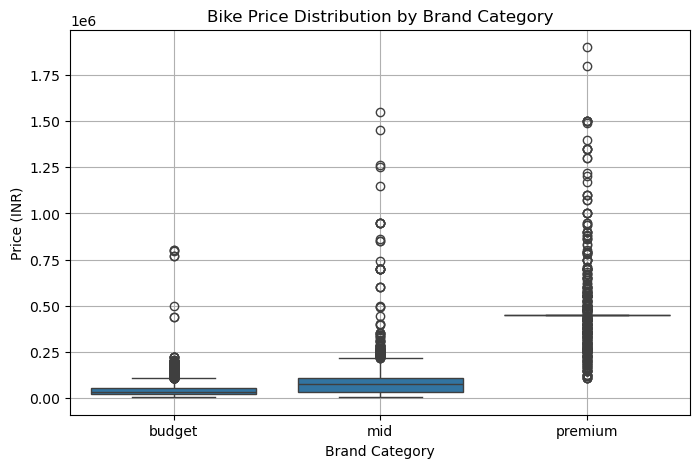

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='brand_category', y='price', data=df_train)
plt.title('Bike Price Distribution by Brand Category')
plt.xlabel('Brand Category')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()


In [11]:
X_train = df_train[['bike_name', 'city', 'kms_driven', 'age', 'Fare', '	power', 'C','Q','S']]
y_train = df_train['Survived']

KeyError: "['Fare', '\\tpower', 'C', 'Q', 'S'] not in index"